# Telecome Churn

## Overview

***This is the dataset of 'Churn Prediction' of 'Telecome' industry.It consists of datas of 7043 customers which includes both male & female,senior citizen.Dataset also gives some informations like how long the customers were in the system,their monthly & total charges,payment method,subscription etc .The target column [churn] is alo given***

 **Importing all libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***loading data***

In [3]:
df = pd.read_csv("Telecom-Churn.csv")

### Q1)Brief information of the dataset
###### a)Shape (finding no. of rows & columns)
###### b)Size (no. of rows * no. of columns)
###### c)Information
###### d)Column names 
###### e)dtypes (Datatype of each column)
###### f)describe (for numerical columns)

In [4]:
#Q1-a)
df.shape

(7043, 21)

In [5]:
#Q1-b)
df.size

147903

In [6]:
#Q1-c)
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [7]:
#Q1-d)
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#Q1-e)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Q1-f)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Q2)Finding first 5 columns**

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Q3) a:Replace "No internet service" to "No" in respected columns**

In [11]:
col_cnvt = ["OnlineBackup","StreamingMovies","DeviceProtection","TechSupport","OnlineSecurity","StreamingTV"]

for i in col_cnvt:
    df[i]=df[i].replace({"No internet service":"No"})

**Q3)b: Replace "No phone service" to "No" in MultipleLines**

In [12]:
df["MultipleLines"]=df["MultipleLines"].replace({"No phone service":"No"})

In [13]:
df.head(16)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Analysing & plotting**

**Q4)Visualising Churn rate of customers**

In [14]:
a=df["Churn"].value_counts()
a

No     5174
Yes    1869
Name: Churn, dtype: int64

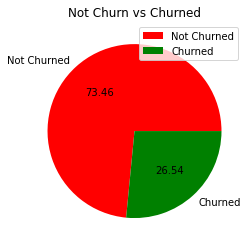

In [15]:
a = df["Churn"].value_counts()
plt.pie(a,labels=["Not Churned","Churned"],colors =["red","green"],autopct="%0.2f")
plt.title("Not Churn vs Churned")
plt.legend()
plt.show()

*ratio of churned & not churned is 73:27*

**Q5)Find the count of senior citizen who churned**

In [16]:
len(df[(df["SeniorCitizen"]==1)&(df["Churn"]=="Yes")])

476

In [17]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

*out of 1142 Senoir citizen, 476 churned the system ie.,41.68%*

**Q6)find out the count in different contract method and hence find which has more churn rate**

In [18]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [19]:
df.Contract.describe()

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object

*Month-to-month method has high churn rate*

**Q7)Plot the above in bargraph**

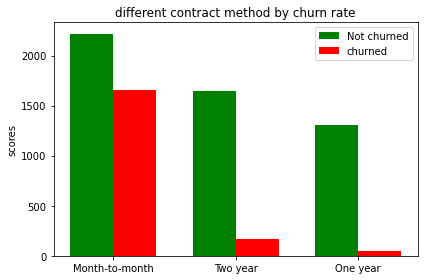

In [20]:
no = df[df["Churn"]=='No'].Contract.value_counts()

yes = df[df["Churn"]=='Yes'].Contract.value_counts()

label=["Month-to-month","Two year","One year"]

x = np.arange(len(label)) 
width = 0.35 

fig,ax = plt.subplots()
rects1= ax.bar(x - width/2,no,width,label="Not churned",color="green")
rects1= ax.bar(x + width/2,yes,width,label="churned",color="red")

ax.set_ylabel('scores')
ax.set_title('different contract method by churn rate')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.show()

**Q8)Analyse the best contract method**

In [21]:
#df[(df["Churn"]=="No")&(df["Contract"]=="One year")].value_counts().sum()   #1307
#df[(df["Churn"]=="Yes")&(df["Contract"]=="One year")].value_counts().sum()  #166
#df[(df["Churn"]=="No")&(df["Contract"]=="Two year")].value_counts().sum()   #1647
df[(df["Churn"]=="Yes")&(df["Contract"]=="Two year")].value_counts().sum()   #48

48

*From above,it shows that 'month-to-month' contract method has more churn rate.while comparing 'Two-year' plan and 'One year' plan its found that customers who opted 'Two year' plan has churn rate only 2% ,and 'one year' has 11%.So by the above anaysis 'Two year' is the best contract method*

*Best contract method is as follows: Two-Year ,One-Year ,Month-to-Month*

**Q9) Find the rate of Seniorcitizen who takes tech support & plot in pie chart**

In [22]:
df.TechSupport.value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

In [23]:
df[(df["TechSupport"]=="Yes")&(df["SeniorCitizen"]==1)].value_counts().sum()

260

In [24]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [25]:
sn=df[df["SeniorCitizen"]==1].TechSupport.value_counts()
sn

No     882
Yes    260
Name: TechSupport, dtype: int64

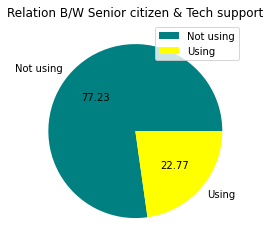

In [26]:
plt.pie(sn,colors =["teal","yellow"],labels=["Not using","Using"],autopct="%0.2f")
plt.title("Relation B/W Senior citizen & Tech support")
plt.legend()
plt.show()

*It is clear from the piechart,Only few senior citizen are using techsupport*

**Q10) How many customers is taking online security or not & plot in graph**

In [27]:
df.OnlineSecurity.value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

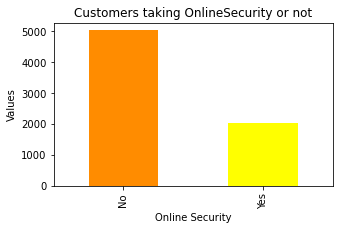

In [28]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
df.OnlineSecurity.value_counts().plot(kind="bar",title="Customers taking OnlineSecurity or not",color=["darkorange","yellow"])
ax.set_xlabel("Online Security")
ax.set_ylabel("Values")
plt.show()

*Customers using Online security vs Not using online security are in the ratio - 29:71*

**Q11)How many customers are using fiber optics services plot by gender wise**

In [29]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [30]:
#df[(df["InternetService"]=="Fiber optic")&(df["gender"]=="Male")].value_counts().sum()  #1543
df[(df["InternetService"]=="Fiber optic")&(df["gender"]=="Female")].value_counts().sum()  #1553

1553

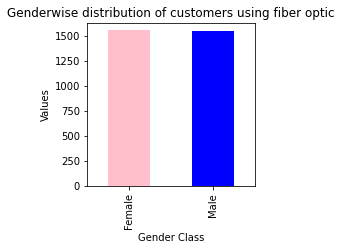

In [31]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
df[df["InternetService"]=="Fiber optic"].gender.value_counts().plot(kind="bar",title="Genderwise distribution of customers using fiber optic",color=["pink","blue"])
ax.set_xlabel("Gender Class")
ax.set_ylabel("Values")
plt.show()

*There is only a slight difference b/w genderwise classification of customers using fiber optic service,females are slight heigher(10) by men*

**Q12)How many customers had churned whose monthly charges is more than 80**

In [32]:
df[df["MonthlyCharges"]>80].value_counts().sum()

2666

In [33]:
df[(df["MonthlyCharges"]>80)&(df["Churn"]=="Yes")].value_counts().sum()

906

*out of 7043 customers 2666 pay monthly charge more than 80 ie.,37% of the total 100% . And out of the 37%  (2666) customers churnned is 906 ie.,33% . But considering the whole customers churn rate persons who pay more than 80 as monthly charge is very low only 12%*

**Q13)How many female customers took online bachup and churned the company**

In [34]:
df[(df["OnlineBackup"]=="Yes")&(df["Churn"]=="Yes")&(df["gender"]=="Female")].value_counts().sum()

265

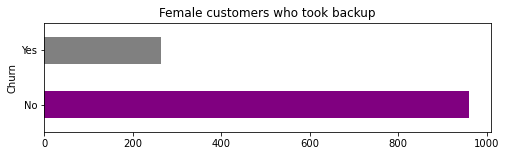

In [35]:
fig.ax =plt.subplots(1,1,figsize=(8,2))

df[(df["OnlineBackup"]=="Yes") & (df["gender"]=="Female")].Churn.value_counts().plot(kind="barh",color=["purple","grey"],title="Female customers who took backup",xlabel="Churn")

plt.show()

**Q14)How many customers are using this company for more than 30 months**

In [36]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [37]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [38]:
df[df["tenure"]>30].value_counts().sum()

3402

In [39]:
df[(df["tenure"]>30)&(df["Churn"]=="No")].value_counts().sum()

2958

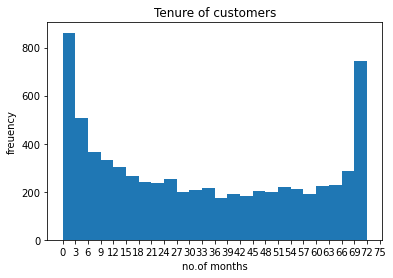

In [40]:
plt.hist(df["tenure"],bins=[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72])
plt.title("Tenure of customers")
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75])
plt.xlabel('no.of months')
plt.ylabel('freuency')
plt.show()

*48% customers are using the company for more than 30 months and out of that 86% remains the company.When tenure increases churn rate comparitively decrease*

**Q15)visualise different payment method trends by customers**

In [41]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

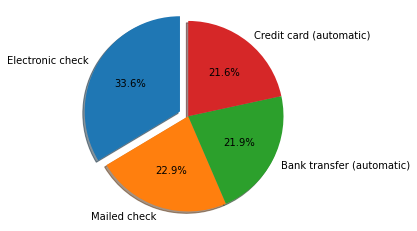

In [42]:
labels = 'Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)' 

explode = (0.1, 0, 0, 0)
sizes = df["PaymentMethod"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

**Q16)Find null values,if any**

In [43]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Q17)Convert Total Charges values to float data type**

In [44]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*After converting the datatype of Total Charges there came 11 missing values which was not there before converting-

In [46]:
df.loc[df["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


*out of 7043 rows  11 rows have missing value ie.,0.15% so we drop them*

*Also these customeres are non churners*

In [47]:
df=df[df["TotalCharges"].notnull()]
df=df.reset_index()[df.columns]

In [48]:
df["TotalCharges"].isnull().sum()

0

In [49]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Q18)Convert categorical value into numerical values for the respected columns**

In [50]:
col_cnvt2= ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in col_cnvt2:
    df[i]=le.fit_transform(df[i])

**Q19) Convert the target column (churn) to numeric**

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Churn"]=le.fit_transform(df["Churn"])

In [53]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,...,1,1,1,1,1,1,3,84.80,1990.50,0
7028,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,0,1,1,1,1,1,103.20,7362.90,0
7029,4801-JZAZL,0,0,1,1,11,0,0,0,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7030,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


**Q20)Find Correlation between target column and feature columns**

In [54]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [55]:
df.corr()['Churn']

gender             -0.008545
SeniorCitizen       0.150541
Partner            -0.149982
Dependents         -0.163128
tenure             -0.354049
PhoneService        0.011691
MultipleLines       0.040033
InternetService    -0.047097
OnlineSecurity     -0.171270
OnlineBackup       -0.082307
DeviceProtection   -0.066193
TechSupport        -0.164716
StreamingTV         0.063254
StreamingMovies     0.060860
Contract           -0.396150
PaperlessBilling    0.191454
PaymentMethod       0.107852
MonthlyCharges      0.192858
TotalCharges       -0.199484
Churn               1.000000
Name: Churn, dtype: float64

In [56]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.490912,0.469042,0.040033
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


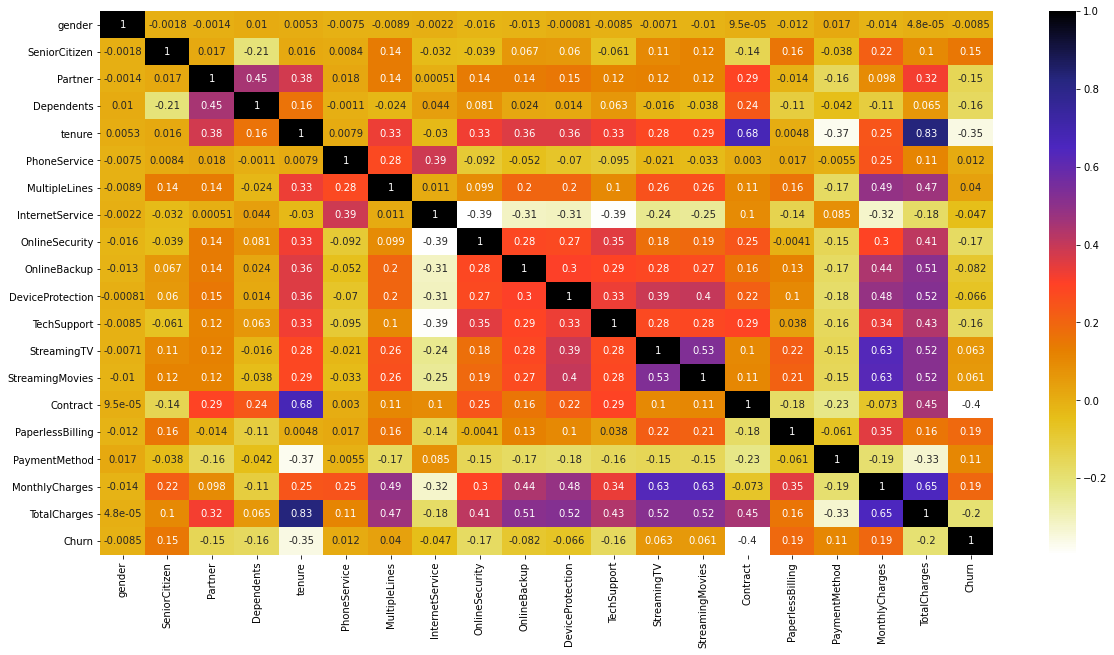

In [57]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r )  
plt.show()

In [58]:
#churn-tenure are highly negative correlated : -0.35
#Churn-contract are highly negative correlated: -0.4
#churn-gender is not correlated
#churn-Totalcharge are negative correlated : -0.2
#churn-Monthlycharge are positive correlated : 0.19
#churn- Techsupport negative correlated: -0.16
#churn-Senior citizen positive correlated: 0.15
#churn-partner negative correlated: -0.15
#churn-dependents negative correlated: -0.16

In [59]:
feature=df.iloc[:,:20]
target=df["Churn"]

In [60]:
feature
target

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int32

In [61]:
feature=feature.drop(["customerID"],axis=1)
feature

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50
7028,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90
7029,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45
7030,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60


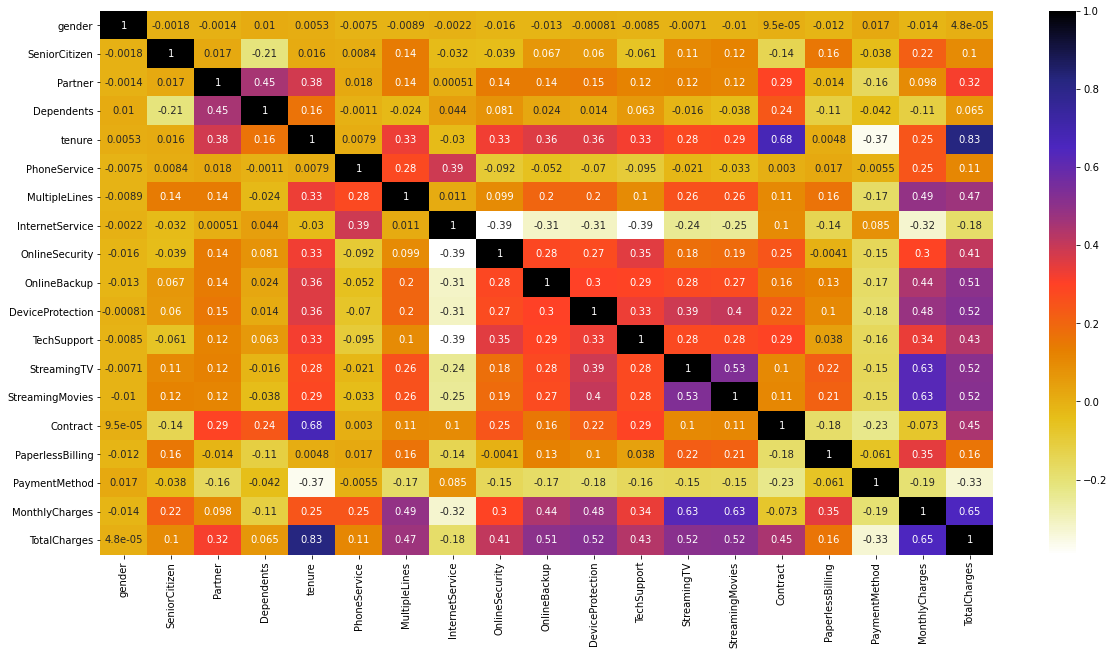

In [62]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(feature.corr(),annot=True,cmap=plt.cm.CMRmap_r)  
plt.show()

In [63]:
#Tenure-Totalcharges are highly positive correlated: 0.83
#Tenure-PaymentMethod are hihly negative correlated: -0.37
#Tenure-Contract are highly positive correlated: 0.68
#Tenure-MonthlyCharges positive correlated: 0.25
#MonthlyCharges-TotalCharges highly positive correlated: 0.65
#Partner-Dependent are correlated by: 0.45
#gender is not somuch correlated anyother column
#seniorcitizen-dependent negativly correlated : -0.21
#TechSupport-MonthlyCharges positive correlated: 0.34
#TechSupport-TotalCharges positive correlated: 0.43

**Q21)Select the best features**

*Finding Partial correlation*

In [64]:
def part_correlation(dataset,thresh):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thresh:
                column = corr_matrix.columns[i]
                col_corr.add(column)
    return col_corr

In [65]:
part_correlation(feature,0.65)

{'Contract', 'TotalCharges'}

In [66]:
part_correlation(feature,0.80)

{'TotalCharges'}

**Q22)Drop unwanted columns**

In [67]:
df=df.drop(["customerID","gender","TotalCharges"],axis=1)

In [68]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,0
7028,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,0
7029,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,0
7030,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,1


# Conclusion

***1:From the above dataset 73.46% customers are non-churners and 26.54% customers are churners.***

***2: In the case of Contract method, monthly customers are more churners as they are not contracted for longer period and can leave easily.***

***3: Customers who are not opting for any Online security,techsupport are more likely to churn the company.***

***4:Gender does not play a high role in customer churning.Gender ratio is almost remains same.***

***5: Customers who are not a senior citizen are high churners campared to senior citizen. May be senior citizen are not availing new updates and only wants some limited benefits ,so remains the company.***

***6: When Monthly charges are high churn rate is high.That is monthlycharges & churn are directly proptional.***

***7:When TotalCharges and Tenure become high , churn rate becomes low.That is they are inversly propotional to churn rate. When tenure become 1 month or low there is high chance of customer to churn.As tenure increases Total charge increases and churn rate decreases.***

***8:When there is a long term contract,tenure etc churn rate is low.***

***9:In the case of Dependents & partners churn rate is comparitively low***

***10:By fixing all the problem that lead to a high churn, can make the customers remain the same company and not churn in future.***

# Future Scope

***By using the above cleaned data we could create a model and with help of that it could be predict, will a customer would churn or not in future for a given new set of data.***